In [11]:
# imoorting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


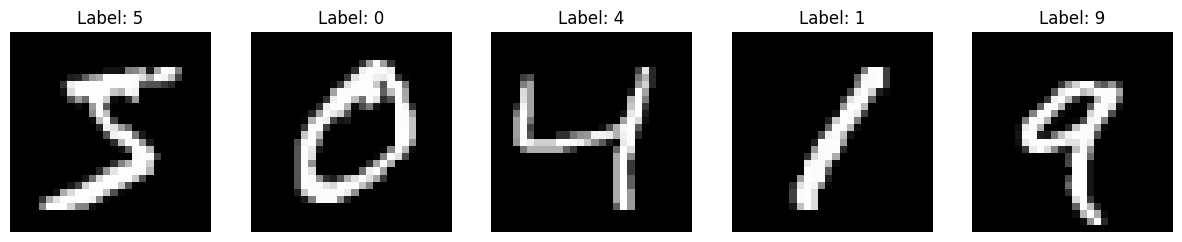

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values of the images to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to include channel dimension (grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Check shapes of the dataset
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

# Display the first 5 images from the training dataset
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(f"Label: {y_train[i]}")
    axs[i].axis('off')
plt.show()

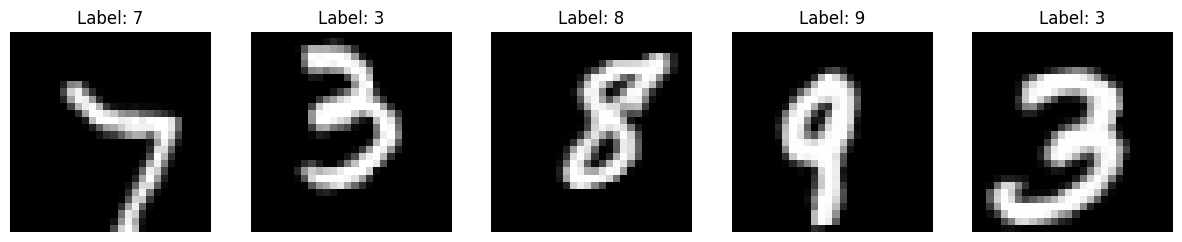

In [5]:
#This cell creates an instance of ImageDataGenerator for the data augmentation
datagen = ImageDataGenerator(
    # randomly rotate images in the range (degrees, 0 to 180)
    rotation_range=10,  
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,   
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,  
    # randomly zoom in/out on images
    zoom_range=0.1           
)

# Fit the data generator on the training data
datagen.fit(x_train)

# Display augmented images
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=5, seed=42):
    for i in range(5):
        axs[i].imshow(x_batch[i].reshape(28, 28), cmap='gray')
        axs[i].set_title(f"Label: {y_batch[i]}")
        axs[i].axis('off')
    break
plt.show()

In [6]:
# Initializing our model
model = Sequential()

# Add the Convolutional layers and MaxPooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())

# Add Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Display model architecture
model.summary()

C:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile the CNN model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Train the CNN model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 30:12 967ms/step - accuracy: 0.0000e+00 - loss: 2.3382

C:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.6492 - loss: 1.0200 - val_accuracy: 0.9816 - val_loss: 0.0602
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9405 - loss: 0.2022 - val_accuracy: 0.9861 - val_loss: 0.0428
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9582 - loss: 0.1473 - val_accuracy: 0.9855 - val_loss: 0.0425
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9666 - loss: 0.1161 - val_accuracy: 0.9879 - val_loss: 0.0365
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9708 - loss: 0.1021 - val_accuracy: 0.9899 - val_loss: 0.0288
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9724 - loss: 0.0952 - val_accuracy: 0.9904 - val_loss: 0.0296
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9767 - loss: 0.0814 - val_accuracy: 0.9907 - val_loss: 0.0334
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9795 - loss: 0.0728

In [8]:
history_df = pd.DataFrame(history.history)
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.816867,0.564629,0.9816,0.060237
1,0.946033,0.186945,0.9861,0.042793
2,0.961467,0.137065,0.9855,0.042489
3,0.967900,0.114888,0.9879,0.036498
4,0.971817,0.100422,0.9899,0.028787


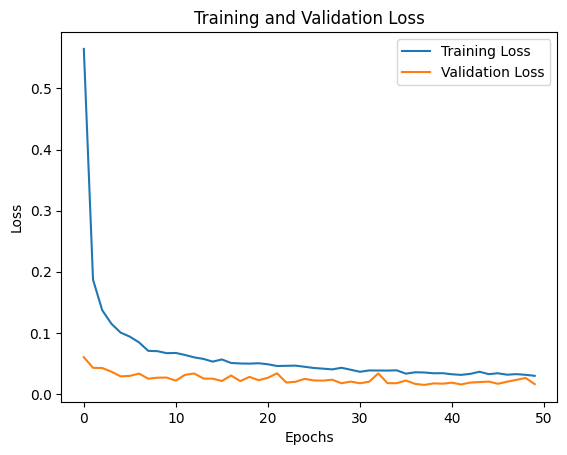

In [9]:
# Plot training against validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

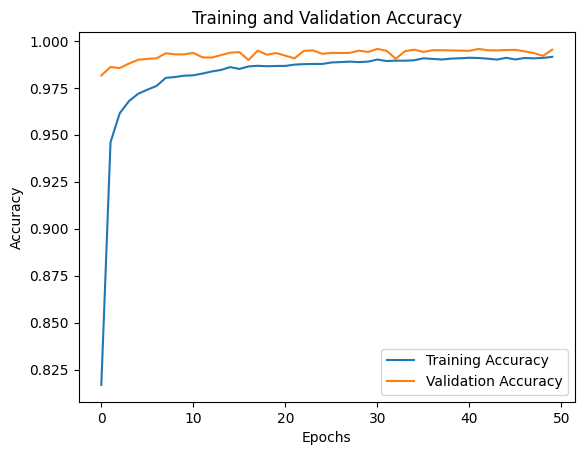

In [10]:
# Plot training againt validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

***Hyperparameter tuning***

In [13]:
# Initializing our model
model = Sequential()

# Add the Convolutional layers and MaxPooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())

# Add Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Display model architecture
model.summary()

C:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model (if not already compiled)
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Training model with early stopping
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.5502 - loss: 1.2940 - val_accuracy: 0.9544 - val_loss: 0.1409
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9189 - loss: 0.2764 - val_accuracy: 0.9857 - val_loss: 0.0451
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9493 - loss: 0.1758 - val_accuracy: 0.9868 - val_loss: 0.0395
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9572 - loss: 0.1478 - val_accuracy: 0.9884 - val_loss: 0.0340
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9659 - loss: 0.1205 - val_accuracy: 0.9910 - val_loss: 0.0292
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9693 - loss: 0.1102 - val_accuracy: 0.9914 - val_loss: 0.0267
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9715 - loss: 0.1018 - val_accuracy: 0.9920 - val_loss: 0.0236
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9727 - loss: 0.1002 - 

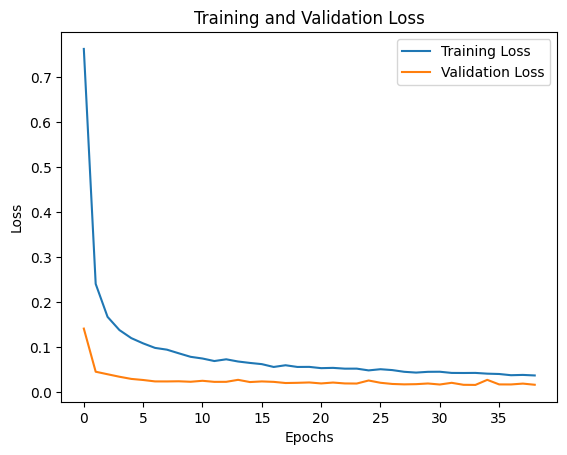

In [15]:
# Plot training against validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

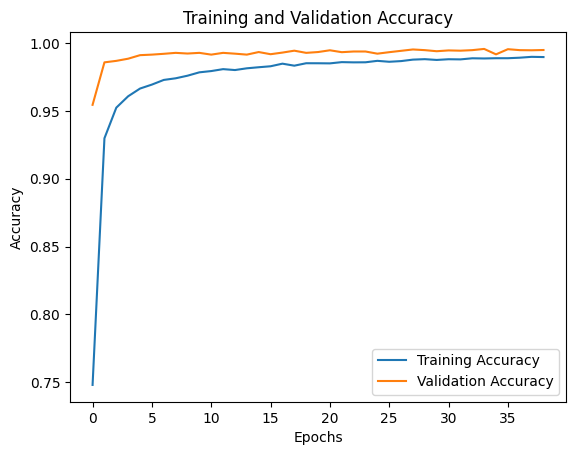

In [16]:
# Plot training againt validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.9956 - loss: 0.0158
Test Accuracy: 99.56%
